In [95]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
 

In [98]:
df=pd.read_csv('D:\Cuvette_python\ipl_final.csv') #reading datset

In [99]:
df.head(50) #top 5 rows of the dataset

mid        date                  venue               bat_team  \
0     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
5     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
6     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
7     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
8     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
9     1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
10    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
11    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
12    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
13    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
14    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
15    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
16    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
17    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
18    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
19    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
20    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
21    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
22    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
23    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
24    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
25    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
26    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
27    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
28    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
29    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
30    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
31    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
32    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
34    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
35    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
36    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
37    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
38    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
39    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
40    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
41    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
42    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
43    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
44    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
45    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
46    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
47    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
48    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
49    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team      batsman     bowler  runs  wickets  overs  \
0   Royal Challengers Bangalore   SC Ganguly    P Kumar     1        0    0.1   
1   Royal Challengers Bangalore  BB McCullum    P Kumar     1        0    0.2   
2   Royal Challengers Bangalore  BB McCullum    P Kumar     2        0    0.2   
3   Royal Challengers Bangalore  BB McCullum    P Kumar     2        0    0.3   
4   Royal Challengers Bangalore  BB McCullum    P Kumar     2        0    0.4  

In [100]:
df.isnull().sum() #checking for null values

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [101]:
df.dropna(how='any',inplace=True) #dropping null values in case present,in this case no null values

In [102]:
df.shape #no of rows and columns in the dataset

(76014, 15)

In [103]:
df.columns #columns of the dataset

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [104]:
df.overs.value_counts() #distinct values of the over column

overs
0.1     655
0.4     652
1.1     650
3.5     649
2.3     649
       ... 
8.0      17
13.0     15
12.0     14
11.0     14
10.0     11
Name: count, Length: 140, dtype: int64

 # Removing early match data

In [105]:
df=df[df['overs']>4.6] #removing early match data

In [106]:
df.shape #after removing no of rows and col

(56707, 15)

In [107]:
df.dtypes #data types of all the columns

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# changing data type of date column and extracting useful information out of it

In [108]:
df['date']=pd.to_datetime(df['date'])

In [109]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
df['quarter'] = df['date'].dt.quarter

In [110]:
df.head(5) #new columns added

mid       date                  venue               bat_team  \
32    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
34    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
35    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
36    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team      batsman  bowler  runs  wickets  overs  \
32  Royal Challengers Bangalore  BB McCullum  Z Khan    61        0    5.1   
33  Royal Challengers Bangalore   SC Ganguly  Z Khan    61        1    5.2   
34  Royal Challengers Bangalore   RT Ponting  Z Khan    61        1    5.3   
35  Royal Challengers Bangalore   RT Ponting  Z Khan    61        1    5.4   
36  Royal Challengers Bangalore   RT Ponting  Z Khan    61        1    5.5   

    ...  wickets_last_5  striker  non-striker  total  year  month  day  \
32  ...               0       41           10    222  2008      4   18   
33  ...               1       41           10    222  2008      4   18   
34  ...               1       41            0    222  2008      4   18   
35  ...               1       41            0    222  2008      4   18   
36  ...               1       41            0    222  2008      4   18   

    dayofweek  is_weekend  quarter  
32          4           0        2  
33          4           0        2  
34          4           0        2  
35          4           0        2  
36          4           0        2  

[5 rows x 21 columns]

In [111]:
df.year.value_counts() #how many years dataset is present

year
2013    6956
2012    6802
2011    6344
2010    5573
2014    5403
2017    5341
2016    5194
2008    5108
2009    4997
2015    4989
Name: count, dtype: int64

In [112]:
df.mid.nunique()

617

# Data Visualization 

No. of matches played per year

In [113]:
matches_year=df.groupby('year')['mid'].nunique()

Text(0, 0.5, 'Number of matches')

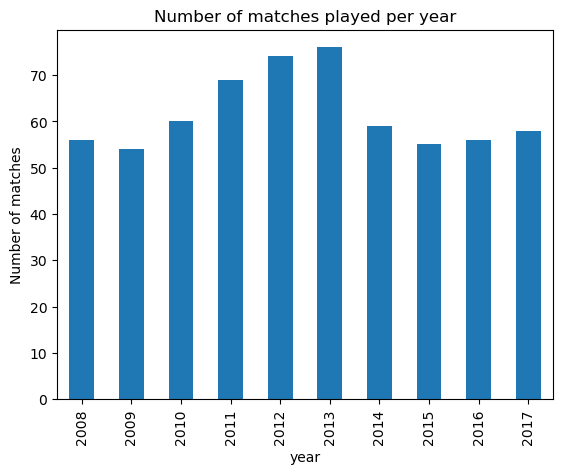

In [114]:
matches_year.plot(kind='bar')
plt.title('Number of matches played per year')
plt.xlabel('year')
plt.ylabel('Number of matches')

Number of matches per venue 

In [115]:
matches_venue=df.groupby('venue')['mid'].nunique()

Text(0, 0.5, 'Number of matches')

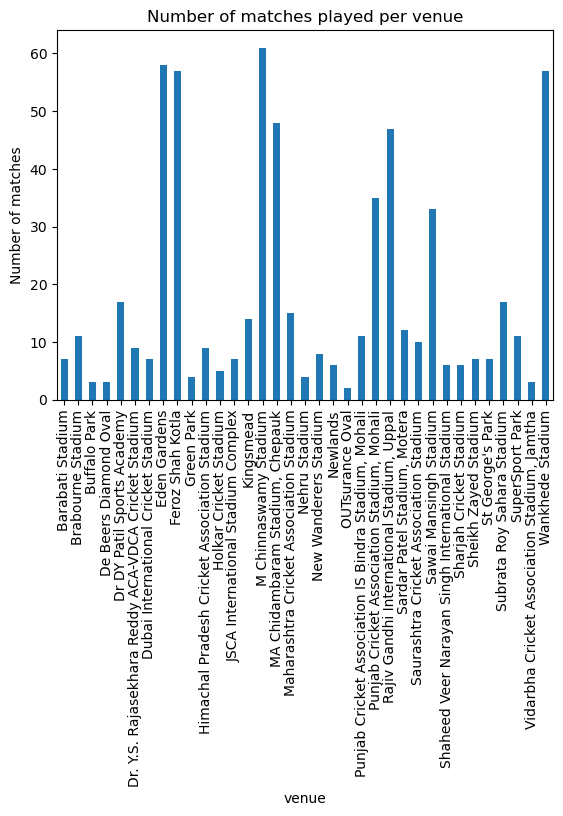

In [116]:
matches_venue.plot(kind='bar')
plt.title('Number of matches played per venue')
plt.xlabel('venue')
plt.ylabel('Number of matches')

Number of matches played by each team 

In [117]:
#taking count of matches played by bat team  and bowl team
batting_teams =df.bat_team.value_counts()
bowling_teams =df.bowl_team.value_counts()

In [118]:
# Merging both counts to get a total match count per team
team_counts = (batting_teams + bowling_teams).sort_values(ascending=False)

#  teams and their match counts
print(team_counts)

Mumbai Indians                 14531
Royal Challengers Bangalore    13386
Kings XI Punjab                13153
Delhi Daredevils               12974
Kolkata Knight Riders          12813
Chennai Super Kings            11690
Rajasthan Royals               10768
Deccan Chargers                 6908
Sunrisers Hyderabad             6584
Pune Warriors                   4142
Gujarat Lions                   2771
Rising Pune Supergiant          1461
Kochi Tuskers Kerala            1207
Rising Pune Supergiants         1026
Name: count, dtype: int64


Total runs scored by each batting team

In [119]:
df.head(2)

mid       date                  venue               bat_team  \
32    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team      batsman  bowler  runs  wickets  overs  \
32  Royal Challengers Bangalore  BB McCullum  Z Khan    61        0    5.1   
33  Royal Challengers Bangalore   SC Ganguly  Z Khan    61        1    5.2   

    ...  wickets_last_5  striker  non-striker  total  year  month  day  \
32  ...               0       41           10    222  2008      4   18   
33  ...               1       41           10    222  2008      4   18   

    dayofweek  is_weekend  quarter  
32          4           0        2  
33          4           0        2  

[2 rows x 21 columns]

In [120]:
total_run=df.groupby('bat_team')['runs'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Run')

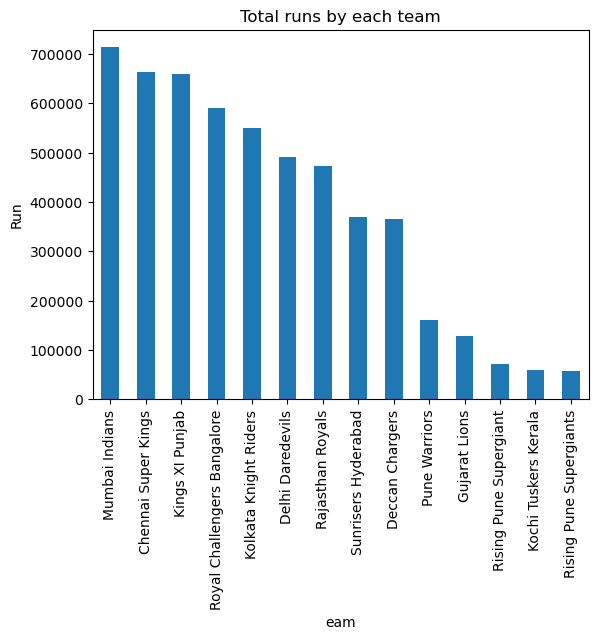

In [121]:
total_run.plot(kind='bar')
plt.title('Total runs by each team')
plt.xlabel('eam')
plt.ylabel('Run')

Total wickets lost by each team

In [122]:
total_wickets=df.groupby('bat_team')['wickets'].sum().sort_values(ascending=False)

Text(0, 0.5, 'wickets')

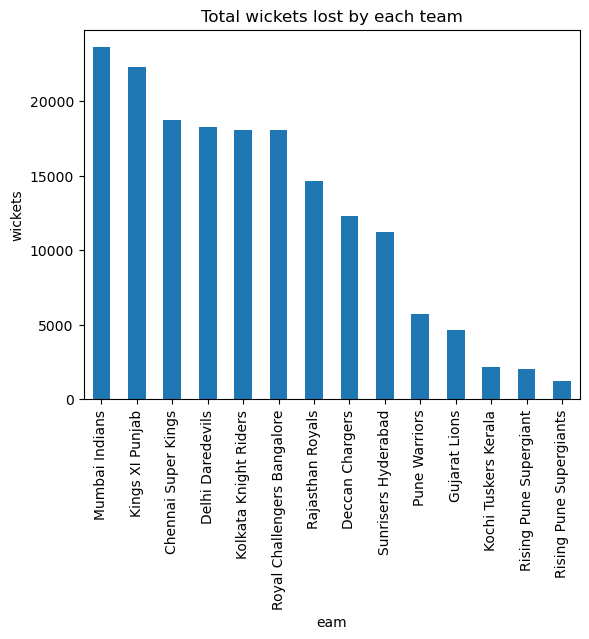

In [123]:
total_wickets.plot(kind='bar')
plt.title('Total wickets lost by each team')
plt.xlabel('eam')
plt.ylabel('wickets')

Average team score per match

In [124]:
avg_run=df.groupby('mid')['runs'].mean()

Text(0, 0.5, 'Run')

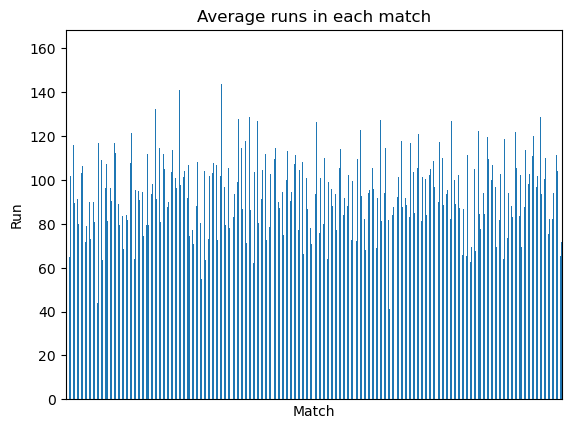

In [125]:
avg_run.plot(kind='bar')
plt.title('Average runs in each match')
plt.xlabel('Match')
plt.xticks([])
plt.ylabel('Run')

In [126]:
df.head(2)

mid       date                  venue               bat_team  \
32    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team      batsman  bowler  runs  wickets  overs  \
32  Royal Challengers Bangalore  BB McCullum  Z Khan    61        0    5.1   
33  Royal Challengers Bangalore   SC Ganguly  Z Khan    61        1    5.2   

    ...  wickets_last_5  striker  non-striker  total  year  month  day  \
32  ...               0       41           10    222  2008      4   18   
33  ...               1       41           10    222  2008      4   18   

    dayofweek  is_weekend  quarter  
32          4           0        2  
33          4           0        2  

[2 rows x 21 columns]

In [127]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'year', 'month', 'day', 'dayofweek',
       'is_weekend', 'quarter'],
      dtype='object')

Highest and lowest innings total by team

In [128]:
team_totals = df.groupby(['mid', 'bat_team'])['total'].first().reset_index() # to avoid repeatition taking only first occurance by team 
team_totals.groupby('bat_team')['total'].agg(['max', 'min'])

max  min
bat_team                             
Chennai Super Kings          246  109
Deccan Chargers              214   82
Delhi Daredevils             231   67
Gujarat Lions                208  126
Kings XI Punjab              232   73
Kochi Tuskers Kerala         178  109
Kolkata Knight Riders        222   67
Mumbai Indians               218   92
Pune Warriors                192   99
Rajasthan Royals             211   81
Rising Pune Supergiant       182  148
Rising Pune Supergiants      195  152
Royal Challengers Bangalore  263   70
Sunrisers Hyderabad          209  113

Average score at each venue

In [129]:
avg_score=df.groupby('venue')['runs'].mean().sort_values(ascending=False)

Text(0, 0.5, 'Avg score')

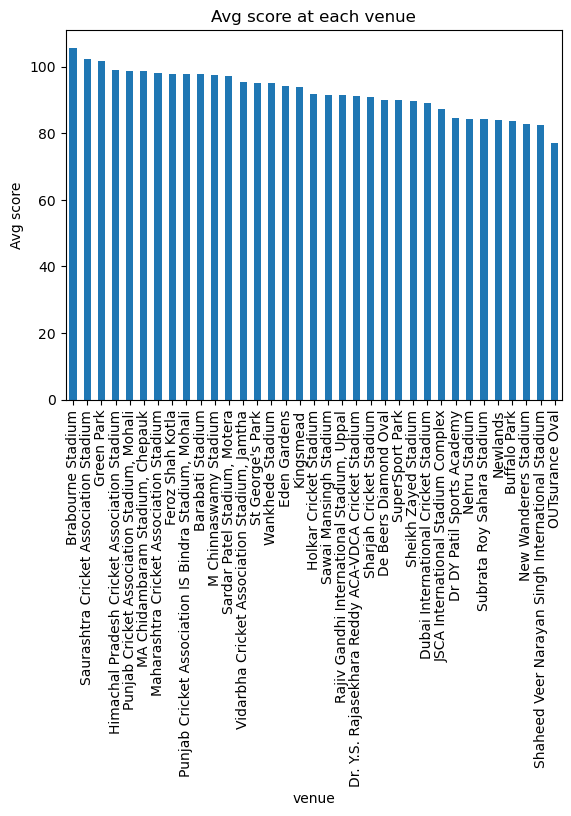

In [130]:
avg_score.plot(kind='bar')
plt.title('Avg score at each venue')
plt.xlabel('venue')
plt.ylabel('Avg score')

Top 10 Venues with high scoring matches

In [131]:
venue_scores = df.groupby(['mid', 'venue'])['total'].first().reset_index()


In [132]:
venue_scores

mid                                       venue  total
0      1                       M Chinnaswamy Stadium    222
1      2  Punjab Cricket Association Stadium, Mohali    240
2      3                            Feroz Shah Kotla    129
3      4                            Wankhede Stadium    165
4      5                                Eden Gardens    110
..   ...                                         ...    ...
612  613     Maharashtra Cricket Association Stadium     73
613  614                            Feroz Shah Kotla    161
614  615                            Wankhede Stadium    162
615  616                       M Chinnaswamy Stadium    107
616  617   Rajiv Gandhi International Stadium, Uppal    129

[617 rows x 3 columns]

In [133]:
venue_scores.groupby('venue')['total'].mean().sort_values(ascending=False).round(2).head(10)

venue
Brabourne Stadium                                       180.36
Himachal Pradesh Cricket Association Stadium            175.67
Saurashtra Cricket Association Stadium                  168.90
M Chinnaswamy Stadium                                   168.30
Barabati Stadium                                        167.71
Maharashtra Cricket Association Stadium                 166.60
MA Chidambaram Stadium, Chepauk                         166.02
Feroz Shah Kotla                                        164.58
Punjab Cricket Association IS Bindra Stadium, Mohali    164.09
Wankhede Stadium                                        163.95
Name: total, dtype: float64

Top batsmen by total runs scored 

In [134]:
df.head(2)

mid       date                  venue               bat_team  \
32    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team      batsman  bowler  runs  wickets  overs  \
32  Royal Challengers Bangalore  BB McCullum  Z Khan    61        0    5.1   
33  Royal Challengers Bangalore   SC Ganguly  Z Khan    61        1    5.2   

    ...  wickets_last_5  striker  non-striker  total  year  month  day  \
32  ...               0       41           10    222  2008      4   18   
33  ...               1       41           10    222  2008      4   18   

    dayofweek  is_weekend  quarter  
32          4           0        2  
33          4           0        2  

[2 rows x 21 columns]

In [135]:
batsman=df.groupby('batsman')['runs'].sum()

In [136]:
batsman.sort_values(ascending=False).head(10)

batsman
MS Dhoni          178889
RG Sharma         137076
SK Raina          136222
V Kohli           122419
AB de Villiers    115090
KA Pollard        107995
KD Karthik        101210
Yuvraj Singh       94777
JP Duminy          87613
RA Jadeja          83021
Name: runs, dtype: int64

Top bowlers by total wickets taken 

In [137]:
bowler=df.groupby('bowler')['wickets'].sum()
bowler.sort_values(ascending=False).head(10)

bowler
PP Chawla          3594
SL Malinga         3593
DJ Bravo           3480
A Mishra           3241
SP Narine          3176
UT Yadav           2977
Harbhajan Singh    2744
SR Watson          2735
RA Jadeja          2685
R Bhatia           2600
Name: wickets, dtype: int64

Most runs by batsman in the last 5 overs

In [138]:
batsman_5=df.groupby('batsman')['runs_last_5'].sum()
batsman_5.sort_values(ascending=False).head(10)

batsman
MS Dhoni          64068
SK Raina          63106
RG Sharma         57757
V Kohli           57070
AB de Villiers    48671
KD Karthik        42227
S Dhawan          38846
KA Pollard        38687
Yuvraj Singh      36889
AT Rayudu         34611
Name: runs_last_5, dtype: int64

Compare teams on batting vs bowling strength

In [139]:
batting_strength = df.groupby('bat_team')['runs'].sum()
bowling_strength = df.groupby('bowl_team')['wickets'].sum()

In [140]:
team_strength = pd.DataFrame({
    'Batting Runs': batting_strength,
    'Wickets Taken': bowling_strength
}).fillna(0)

In [141]:
team_strength

Batting Runs  Wickets Taken
Chennai Super Kings                664454          14928
Deccan Chargers                    365663           9402
Delhi Daredevils                   492089          23802
Gujarat Lions                      127908           4262
Kings XI Punjab                    659457          18104
Kochi Tuskers Kerala                59067           1858
Kolkata Knight Riders              549459          21130
Mumbai Indians                     713415          20965
Pune Warriors                      160594           6207
Rajasthan Royals                   473620          18849
Rising Pune Supergiant              71943           2810
Rising Pune Supergiants             57753           1433
Royal Challengers Bangalore        590170          21054
Sunrisers Hyderabad                370000           8219

Bowlers Impact in Last 5 Overs

In [142]:
df.head(2)

mid       date                  venue               bat_team  \
32    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1 2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team      batsman  bowler  runs  wickets  overs  \
32  Royal Challengers Bangalore  BB McCullum  Z Khan    61        0    5.1   
33  Royal Challengers Bangalore   SC Ganguly  Z Khan    61        1    5.2   

    ...  wickets_last_5  striker  non-striker  total  year  month  day  \
32  ...               0       41           10    222  2008      4   18   
33  ...               1       41           10    222  2008      4   18   

    dayofweek  is_weekend  quarter  
32          4           0        2  
33          4           0        2  

[2 rows x 21 columns]

In [143]:
wickets_5=df.groupby('bowler')['wickets_last_5'].sum()
wickets_5.sort_values(ascending=False).head(10)

bowler
PP Chawla          1639
SL Malinga         1484
A Mishra           1462
DJ Bravo           1395
SP Narine          1384
Harbhajan Singh    1355
SR Watson          1232
UT Yadav           1217
R Bhatia           1203
RA Jadeja          1132
Name: wickets_last_5, dtype: int64

Wicket fall trends by season

In [144]:
wickets_by_season = df.groupby('year')['wickets'].mean().reset_index()

[]

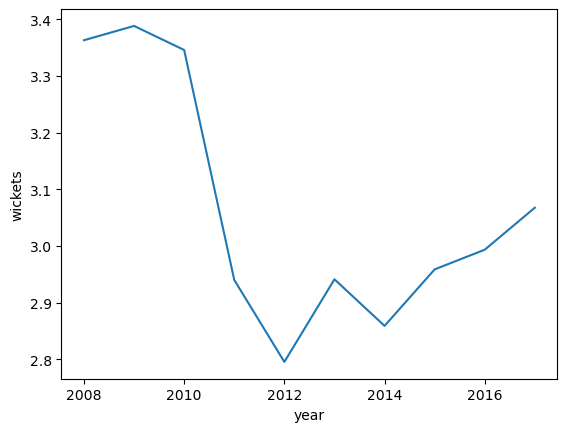

In [145]:
sns.lineplot(data=wickets_by_season,x='year',y='wickets')
plt.plot()

Average score trends by season

In [146]:
runs_by_season = df.groupby('year')['runs'].mean().reset_index()

<Axes: xlabel='year', ylabel='runs'>

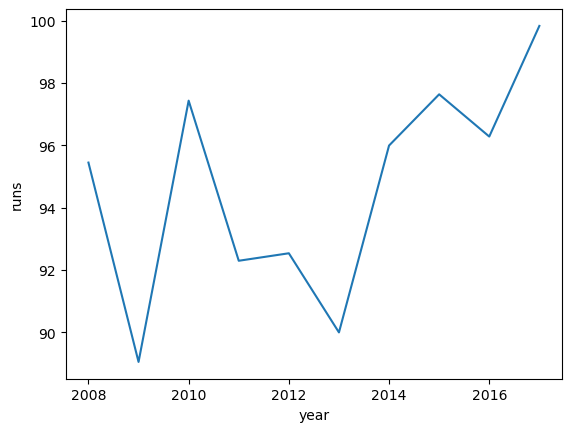

In [147]:
sns.lineplot(data=runs_by_season,x='year',y='runs')

Bowling Impact in Last 5 Overs

In [148]:
last5_wickets = df.groupby('bowl_team')['wickets_last_5'].sum().sort_values(ascending=False)
last5_wickets  # teams with most impact at the death

bowl_team
Delhi Daredevils               10189
Royal Challengers Bangalore     9399
Kolkata Knight Riders           9310
Mumbai Indians                  9061
Kings XI Punjab                 8010
Rajasthan Royals                7625
Chennai Super Kings             6397
Deccan Chargers                 3777
Sunrisers Hyderabad             3701
Pune Warriors                   2844
Gujarat Lions                   1729
Rising Pune Supergiant          1215
Kochi Tuskers Kerala             716
Rising Pune Supergiants          612
Name: wickets_last_5, dtype: int64

# keeping consistent teams

In [149]:
# Manually taken the threshold for consistency (e.g teams with 10,000+ matches)
consistent_teams = team_counts[team_counts > 10000].index.tolist()

print("Consistent Teams:", consistent_teams)

Consistent Teams: ['Mumbai Indians', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals']


In [150]:
# Filter matches where both teams are consistent
df=df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]


In [151]:
df.isnull().sum().sum()

0

# 	Removing Unwanted Columns

In [152]:
df.drop(columns=['batsman','bowler','striker','non-striker','date'],inplace=True)

In [153]:
df.head(5)

mid                  venue               bat_team  \
32    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
34    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
35    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
36    1  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team  runs  wickets  overs  runs_last_5  \
32  Royal Challengers Bangalore    61        0    5.1           59   
33  Royal Challengers Bangalore    61        1    5.2           59   
34  Royal Challengers Bangalore    61        1    5.3           59   
35  Royal Challengers Bangalore    61        1    5.4           59   
36  Royal Challengers Bangalore    61        1    5.5           58   

    wickets_last_5  total  year  month  day  dayofweek  is_weekend  quarter  
32               0    222  2008      4   18          4           0        2  
33               1    222  2008      4   18          4           0        2  
34               1    222  2008      4   18          4           0        2  
35               1    222  2008      4   18          4           0        2  
36               1    222  2008      4   18          4           0        2

In [154]:
df.shape

(34443, 16)

In [155]:
df.dtypes

mid                 int64
venue              object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
year                int32
month               int32
day                 int32
dayofweek           int32
is_weekend          int64
quarter             int32
dtype: object

In [156]:
df.isnull().sum()

mid               0
venue             0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
year              0
month             0
day               0
dayofweek         0
is_weekend        0
quarter           0
dtype: int64

In [157]:
df.head(5)

mid                  venue               bat_team  \
32    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
33    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
34    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
35    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
36    1  M Chinnaswamy Stadium  Kolkata Knight Riders   

                      bowl_team  runs  wickets  overs  runs_last_5  \
32  Royal Challengers Bangalore    61        0    5.1           59   
33  Royal Challengers Bangalore    61        1    5.2           59   
34  Royal Challengers Bangalore    61        1    5.3           59   
35  Royal Challengers Bangalore    61        1    5.4           59   
36  Royal Challengers Bangalore    61        1    5.5           58   

    wickets_last_5  total  year  month  day  dayofweek  is_weekend  quarter  
32               0    222  2008      4   18          4           0        2  
33               1    222  2008      4   18          4           0        2  
34               1    222  2008      4   18          4           0        2  
35               1    222  2008      4   18          4           0        2  
36               1    222  2008      4   18          4           0        2

 # One-Hot Encode categorical variables (bat_team and bowl_team)

In [158]:
categorical_cols=['bat_team','bowl_team','venue']
for col in categorical_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
ohe=OneHotEncoder(sparse_output=False)
encoded_array=ohe.fit_transform(df[categorical_cols])
encoded_df=pd.DataFrame(encoded_array,columns=ohe.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [159]:
df.head(5)

mid  runs  wickets  overs  runs_last_5  wickets_last_5  total    year  \
32  1.0  61.0      0.0    5.1         59.0             0.0  222.0  2008.0   
33  1.0  61.0      1.0    5.2         59.0             1.0  222.0  2008.0   
34  1.0  61.0      1.0    5.3         59.0             1.0  222.0  2008.0   
35  1.0  61.0      1.0    5.4         59.0             1.0  222.0  2008.0   
36  1.0  61.0      1.0    5.5         58.0             1.0  222.0  2008.0   

    month   day  ...  venue_20  venue_21  venue_22  venue_23  venue_24  \
32    4.0  18.0  ...       0.0       0.0       0.0       0.0       0.0   
33    4.0  18.0  ...       0.0       0.0       0.0       0.0       0.0   
34    4.0  18.0  ...       0.0       0.0       0.0       0.0       0.0   
35    4.0  18.0  ...       0.0       0.0       0.0       0.0       0.0   
36    4.0  18.0  ...       0.0       0.0       0.0       0.0       0.0   

    venue_25  venue_26  venue_27  venue_28  venue_29  
32       0.0       0.0       0.0       0.0       0.0  
33       0.0       0.0       0.0       0.0       0.0  
34       0.0       0.0       0.0       0.0       0.0  
35       0.0       0.0       0.0       0.0       0.0  
36       0.0       0.0       0.0       0.0       0.0  

[5 rows x 57 columns]

In [160]:
df.dropna(how='any',inplace=True)

# Feature Selection(ensuring the most relevant features are selected for the model)

In [161]:
df.columns

Index(['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'quarter',
       'bat_team_0', 'bat_team_1', 'bat_team_2', 'bat_team_3', 'bat_team_4',
       'bat_team_5', 'bat_team_6', 'bowl_team_0', 'bowl_team_1', 'bowl_team_2',
       'bowl_team_3', 'bowl_team_4', 'bowl_team_5', 'bowl_team_6', 'venue_0',
       'venue_1', 'venue_2', 'venue_3', 'venue_4', 'venue_5', 'venue_6',
       'venue_7', 'venue_8', 'venue_9', 'venue_10', 'venue_11', 'venue_12',
       'venue_13', 'venue_14', 'venue_15', 'venue_16', 'venue_17', 'venue_18',
       'venue_19', 'venue_20', 'venue_21', 'venue_22', 'venue_23', 'venue_24',
       'venue_25', 'venue_26', 'venue_27', 'venue_28', 'venue_29'],
      dtype='object')

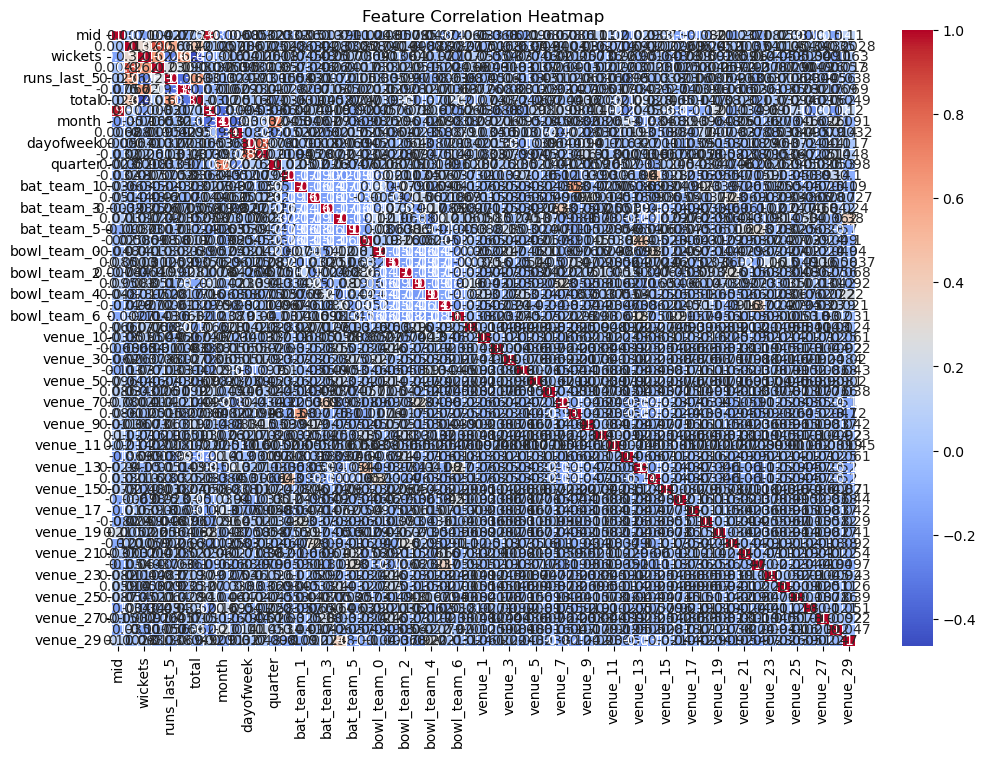

In [162]:
# Drop categorical columns 
numerical_data = df.select_dtypes(include=[np.number])

# Computing correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [163]:
# Selecting features highly correlated with the target variable 'total'
correlation_threshold = 0.3
high_correlation_features = correlation_matrix['total'][abs(correlation_matrix['total']) > correlation_threshold].index.tolist()

# Removing 'total' from the feature list since it's the target
high_correlation_features.remove('total')

print("Selected Features Based on Correlation:", high_correlation_features)

Selected Features Based on Correlation: ['runs', 'wickets', 'runs_last_5', 'wickets_last_5']


In [164]:
numerical_cols=['runs','wickets','overs','runs_last_5','wickets_last_5','year','month','day','dayofweek','is_weekend','quarter']

# Splitting Data into Training and Testing Sets

In [165]:
x = df.drop(columns=['total'])  # Features
y = df['total']  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#scaler = StandardScaler() no continous numerical column expect overs ...scaling discrete/categorical column introduces null

# Fit on Train Data
#x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])

# Transform Test Data using the Same Scaler
#x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [166]:
df.isnull().sum()

mid               0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
year              0
month             0
day               0
dayofweek         0
is_weekend        0
quarter           0
bat_team_0        0
bat_team_1        0
bat_team_2        0
bat_team_3        0
bat_team_4        0
bat_team_5        0
bat_team_6        0
bowl_team_0       0
bowl_team_1       0
bowl_team_2       0
bowl_team_3       0
bowl_team_4       0
bowl_team_5       0
bowl_team_6       0
venue_0           0
venue_1           0
venue_2           0
venue_3           0
venue_4           0
venue_5           0
venue_6           0
venue_7           0
venue_8           0
venue_9           0
venue_10          0
venue_11          0
venue_12          0
venue_13          0
venue_14          0
venue_15          0
venue_16          0
venue_17          0
venue_18          0
venue_19          0
venue_20          0
venue_21          0
venue_22          0


In [167]:
x_train.head()

mid  runs  wickets  overs  runs_last_5  wickets_last_5    year  \
27377  222.0  49.0      0.0    6.3         39.0             0.0  2011.0   
1952    16.0  93.0      7.0   15.6         21.0             4.0  2008.0   
29273  237.0  95.0      5.0   14.2         50.0             1.0  2011.0   
15494  126.0  45.0      1.0    7.1         32.0             1.0  2010.0   
3478    29.0  40.0      2.0    5.5         37.0             2.0  2008.0   

       month   day  dayofweek  ...  venue_20  venue_21  venue_22  venue_23  \
27377    5.0  11.0        2.0  ...       0.0       0.0       0.0       0.0   
1952     4.0  29.0        1.0  ...       0.0       0.0       0.0       0.0   
29273    5.0  25.0        2.0  ...       0.0       0.0       0.0       0.0   
15494    3.0  21.0        6.0  ...       0.0       0.0       0.0       0.0   
3478     5.0   8.0        3.0  ...       0.0       0.0       1.0       0.0   

       venue_24  venue_25  venue_26  venue_27  venue_28  venue_29  
27377       0.0       0.0       0.0       0.0       0.0       1.0  
1952        0.0       0.0       0.0       0.0       0.0       0.0  
29273       0.0       0.0       0.0       0.0       0.0       0.0  
15494       0.0       0.0       0.0       0.0       0.0       0.0  
3478        0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 56 columns]

In [168]:
mean_target =y.mean() #storing mean value to compare in future
base_model = LinearRegression()#base model for adaboost

# Model Building

In [169]:

# Model Training and Evaluation
def train_and_evaluate(x_train,x_test,y_train,y_test, model, model_name):
    model.fit(x_train, y_train)
    print(model_name )
    print("Results on Test dataset----------")
    y_pred = model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    relative_rmse=(rmse/mean_target)*100
    print("Relative RMSE -",relative_rmse)
    r2 = r2_score(y_test, y_pred)
    print(f"R²: {r2 * 100:.2f}% of the variance in the target variable is explained by the model.")
    print("Results on train data set---------------")
    y_train_pred = model.predict(x_train)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    mean_target_train = np.mean(y_train)
    train_relative_rmse = (train_rmse / mean_target_train) * 100
    train_r2 = r2_score(y_train, y_train_pred)
    print("Relative RMSE -",relative_rmse)
    print(f"R²: {r2 * 100:.2f}% of the variance in the target variable is explained by the model.")

models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(),
    "adaboost_model":AdaBoostRegressor(base_model, n_estimators=50, learning_rate=0.1, random_state=42),
     "DecisionTreeRegressor":DecisionTreeRegressor(max_depth=5, random_state=42)}







for name, model in models.items(): 
    train_and_evaluate(x_train, x_test,y_train,y_test, model, name)

Linear_Regression
Results on Test dataset----------
Relative RMSE - 10.323745091319001
R²: 72.17% of the variance in the target variable is explained by the model.
Results on train data set---------------
Relative RMSE - 10.323745091319001
R²: 72.17% of the variance in the target variable is explained by the model.
Random_Forest
Results on Test dataset----------
Relative RMSE - 1.8426017716859266
R²: 99.11% of the variance in the target variable is explained by the model.
Results on train data set---------------
Relative RMSE - 1.8426017716859266
R²: 99.11% of the variance in the target variable is explained by the model.
adaboost_model
Results on Test dataset----------
Relative RMSE - 10.505115927003596
R²: 71.18% of the variance in the target variable is explained by the model.
Results on train data set---------------
Relative RMSE - 10.505115927003596
R²: 71.18% of the variance in the target variable is explained by the model.
DecisionTreeRegressor
Results on Test dataset----------


# hyperparameter tuning

In [170]:
#model for grid search
param_grid = {
    "Linear Regression": {
        "fit_intercept": [True, False]
    },
    "Random Forest": {
        "n_estimators": [50, 200],
        "max_depth": [None, 20],
        "min_samples_split": [10]
    }
}
# To store best model
best_models = {}
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    y_pred = best_model.predict(X_test)

    print(model_name )
    print("Results on Test dataset----------")
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    relative_rmse = (rmse / mean_target) * 100  # model’s average prediction error is relative_rmse of the mean target value.
    print(f"Relative RMSE: model’s average prediction error is  {relative_rmse:.2f}% of the mean target value.")

    r2 = r2_score(y_test, y_pred)
    print(f"R²: {r2 * 100:.2f}% of the variance in the target variable is explained by the model.")
    print("Results on train data set---------------")
    y_train_pred = best_model.predict(x_train)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    mean_target_train = np.mean(y_train)
    train_relative_rmse = (train_rmse / mean_target_train) * 100
    train_r2 = r2_score(y_train, y_train_pred)
    print("Relative RMSE -",relative_rmse)
    print(f"R²: {train_r2 * 100:.2f}% of the variance in the target variable is explained by the model.")

    print(f"Best Parameters: {grid_search.best_params_}\n")

 #Models to evaluate
model_grid = {
   "Linear Regression": LinearRegression(),
  "Random Forest": RandomForestRegressor()
}

# Train and evaluate models
for name, model in model_grid.items():
    train_and_evaluate(x_train, x_test, y_train, y_test, model, name, param_grid[name])


Linear Regression
Results on Test dataset----------
Relative RMSE: model’s average prediction error is  10.32% of the mean target value.
R²: 72.17% of the variance in the target variable is explained by the model.
Results on train data set---------------
Relative RMSE - 10.32374509131967
R²: 70.82% of the variance in the target variable is explained by the model.
Best Parameters: {'fit_intercept': False}

Random Forest
Results on Test dataset----------
Relative RMSE: model’s average prediction error is  2.13% of the mean target value.
R²: 98.81% of the variance in the target variable is explained by the model.
Results on train data set---------------
Relative RMSE - 2.1331354700860103
R²: 99.65% of the variance in the target variable is explained by the model.
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}



# Predicting IPL Scores using random forest model

In [173]:
 import pickle

lg=models["Random_Forest"]

# Save the trained model using pickle
with open("ipl_score_predictor.pkl", "wb") as model_file:
    pickle.dump(lg, model_file)

print(" Model saved successfully as 'ipl_score_predictor.pkl'.")

 Model saved successfully as 'ipl_score_predictor.pkl'.


In [174]:
# Load the trained model
with open("ipl_score_predictor.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

print(" Model loaded successfully!")

# Define match details for prediction
match_data = [
    {'bat_team': 'Kolkata Knight Riders', 'bowl_team': 'Delhi Daredevils', 'year': 2018, 'match_no': 13},
    {'bat_team': 'Sunrisers Hyderabad', 'bowl_team': 'Royal Challengers Bangalore', 'year': 2018, 'match_no': 39},
    {'bat_team': 'Mumbai Indians', 'bowl_team': 'Kings XI Punjab', 'year': 2019, 'match_no': 59},
    {'bat_team': 'Rajasthan Royals', 'bowl_team': 'Chennai Super Kings', 'year': 2019, 'match_no': 25}
]

# Convert to DataFrame
match_df = pd.DataFrame(match_data)

# Encode categorical variables (must match training data encoding)
encoded_matches = pd.get_dummies(match_df, columns=['bat_team', 'bowl_team'])

# Ensure feature columns match the training data
missing_cols = set(x_train.columns) - set(encoded_matches.columns)
for col in missing_cols:
    encoded_matches[col] = 0  # Add missing columns with 0 values

# Reorder columns to match training data
encoded_matches = encoded_matches[x_train.columns]

# Make predictions using the loaded model
predicted_scores = loaded_model.predict(encoded_matches)

# Display predictions
for i, match in enumerate(match_data):
    print(f"{match['bat_team']} vs. {match['bowl_team']} ({match['year']}, Match {match['match_no']})")
    predicted_score = round(predicted_scores[i])
    #wickets = np.random.randint(6, 10)  # Randomly assign wickets
    print(f" Predicted Score: {predicted_score}\n")


 Model loaded successfully!
Kolkata Knight Riders vs. Delhi Daredevils (2018, Match 13)
 Predicted Score: 165

Sunrisers Hyderabad vs. Royal Challengers Bangalore (2018, Match 39)
 Predicted Score: 165

Mumbai Indians vs. Kings XI Punjab (2019, Match 59)
 Predicted Score: 165

Rajasthan Royals vs. Chennai Super Kings (2019, Match 25)
 Predicted Score: 165

